# 컴퓨터 비전을 위한 딥러닝
## 합성곱 신경망(Convolutional Neural Network, CNN)

In [1]:
# 간단한 CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1))) # img_height, img_width, img_channels
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu"))

model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

c:\Users\spec3\anaconda3\envs\tfpy\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [3]:
from tensorflow.keras.datasets import mnist
import tensorflow as tf

(train_imgs, trian_labels), (test_imgs, test_labels) = mnist.load_data()

train_imgs = train_imgs.reshape((60000, 28, 28, 1))
train_imgs = train_imgs.astype("float32")/255

test_imgs = test_imgs.reshape((10000, 28, 28, 1))
test_imgs = test_imgs.astype("float32")/255

trian_labels = tf.keras.utils.to_categorical(trian_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [4]:
model.compile(
    optimizer = "rmsprop",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

In [5]:
with tf.device(":/GPU:0"):
    hist = model.fit(train_imgs, trian_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 18s 19ms/step - loss: 0.1717 - accuracy: 0.9466
Epoch 2/5
938/938 [==============================] - 18s 19ms/step - loss: 0.0466 - accuracy: 0.9854
Epoch 3/5
938/938 [==============================] - 18s 19ms/step - loss: 0.0311 - accuracy: 0.9906
Epoch 4/5
938/938 [==============================] - 18s 19ms/step - loss: 0.0234 - accuracy: 0.9926
Epoch 5/5
938/938 [==============================] - 18s 19ms/step - loss: 0.0179 - accuracy: 0.9946


In [6]:
test_loss, test_acc = model.evaluate(test_imgs, test_labels)
test_acc

313/313 [==============================] - 1s 3ms/step - loss: 0.0327 - accuracy: 0.9907


0.9907000064849854

### 합성곱 연산
Dense(FC, 완전 연결층) 층은 입력 특성 공간에 있는 전역 패턴을 학습하지만 Conv(합성곱 층) 층은 지역 패턴을 학습함  
- 학습된 패턴은 평행 이동 불변성(translate invariant)을 가짐  
- 패턴의 공간적 계측 구조를 학습할 수 있음  

합성곱 연산은 **특성 맵(feature map)** 이라고 부르는 3D 텐서에 적용  
-> 특성 맵에서 작은 패치(patch)들을 추출  
-> 변환을 적용해 **출력 특성 맵(ouput feature map)** 을 만듬

- 입력으로부터 뽑아낼 패치의 크기(필터 사이즈)
- 특성 맵의 출력 깊이(필터의 수)

```python
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)))
```
해당 부분은, (28, 28, 1) 크기의 특성 맵을 입력으로 받아 (26, 26, 32) 크기의 특성 맵(응답 맵(response map))을 출력 -> 입력에 대해 32개의 필터를 적용

#### 패딩(padding)과 스트라이드(stride)

#### 최대 풀링 연산(MaxPooling2D)
스트라이드 합성곱과 유사하게 특성 맵을 다운 샘플링

## 소규모 데이터셋에서 밑바닥부터 컨브넷(CNN) 훈련하기
[데이터셋 | Dogs vs Cats datasets](https://www.kaggle.com/datasets/shaunthesheep/microsoft-catsvsdogs-dataset)  

In [12]:
import os
import splitfolders

original_dataset_dir = "../dogs_vs_cats/"

splitfolders.ratio(original_dataset_dir, output="out", ratio=(0.5, 0.25, 0.25))

In [20]:
import os, shutil

original_dataset_dir ="../dogs_vs_cats/train/"
# 소규모 데이터셋을 저장할 디렉토리
base_dir = "../dogs_vs_cats/cats_and_dogs_small"
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, "train")
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, "validation")
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, "test")
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, "cats")
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, "dogs")
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, "cats")
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, "dogs")
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, "cats")
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, "dogs")
os.mkdir(test_dogs_dir)

In [21]:
fnames = ["cat.{}.jpg".format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ["cat.{}.jpg".format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ["cat.{}.jpg".format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ["dog.{}.jpg".format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ["dog.{}.jpg".format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ["dog.{}.jpg".format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [22]:
print(f"Train Cats: {len(os.listdir(train_cats_dir))}")
print(f"Train Dogs: {len(os.listdir(train_dogs_dir))}")
print(f"Validation Cats: {len(os.listdir(validation_cats_dir))}")
print(f"Validation Dogs: {len(os.listdir(validation_dogs_dir))}")
print(f"Test Cats: {len(os.listdir(test_cats_dir))}")
print(f"Test Dogs: {len(os.listdir(test_dogs_dir))}")

Train Cats: 1000
Train Dogs: 1000
Validation Cats: 500
Validation Dogs: 500
Test Cats: 500
Test Dogs: 500


### 네트워크 구성

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dense(1, activation="sigmoid")) # 이진 분류 문제

In [27]:
import tensorflow as tf

model.compile(
    optimizer=tf.keras.optimizers.RMSprop(lr=1e-4),
    loss = tf.keras.losses.binary_crossentropy,
    metrics=["acc"]
)

In [29]:
# 이미지 파일을 전처리된 배치 텐서로 자동으로 바꾸어주는 파이썬 제너레이터
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode="binary")
validation_genrator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [30]:
for data_batch, labels_batch in train_generator:
    print(f"Batch Data: {data_batch.shape}")
    print(f"Batch Label: {labels_batch.shape}")
    break

Batch Data: (20, 150, 150, 3)
Batch Label: (20,)


In [33]:
with tf.device(":/GPU:0"):
    history = model.fit(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_genrator, validation_steps=50)

Epoch 1/30
100/100 [==============================] - 33s 325ms/step - loss: 0.6734 - acc: 0.5735 - val_loss: 0.6591 - val_acc: 0.5860
Epoch 2/30
100/100 [==============================] - 29s 294ms/step - loss: 0.6294 - acc: 0.6410 - val_loss: 0.6520 - val_acc: 0.5900
Epoch 3/30
100/100 [==============================] - 28s 283ms/step - loss: 0.5872 - acc: 0.6850 - val_loss: 0.6178 - val_acc: 0.6490
Epoch 4/30
100/100 [==============================] - 28s 284ms/step - loss: 0.5486 - acc: 0.7210 - val_loss: 0.5840 - val_acc: 0.6950
Epoch 5/30
100/100 [==============================] - 29s 287ms/step - loss: 0.5240 - acc: 0.7435 - val_loss: 0.6405 - val_acc: 0.6510
Epoch 6/30
100/100 [==============================] - 29s 291ms/step - loss: 0.4908 - acc: 0.7605 - val_loss: 0.5564 - val_acc: 0.7020
Epoch 7/30
100/100 [==============================] - 29s 291ms/step - loss: 0.4644 - acc: 0.7790 - val_loss: 0.5552 - val_acc: 0.7230
Epoch 8/30
100/100 [==============================] - 2

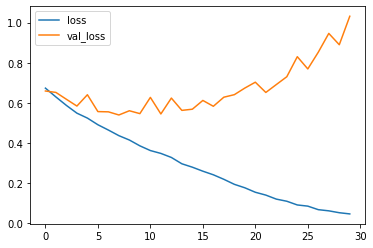

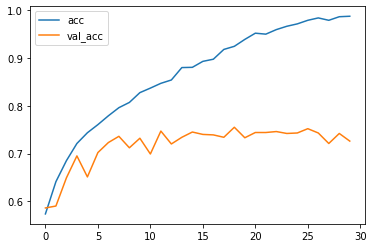

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

df_hist = pd.DataFrame(history.history)
df_hist[["loss", "val_loss"]].plot()
df_hist[["acc", "val_acc"]].plot()
plt.show()

### 데이터 증식 사용하기
기존 훈련 샘플로부터 더 많은 훈련 데이터를 생성하는 방법  
1보다 작은 소수 입력시 비율, 정수 입력시 (-n , +n), 1보다 큰 소수 입력시 (-f, +f]

In [101]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

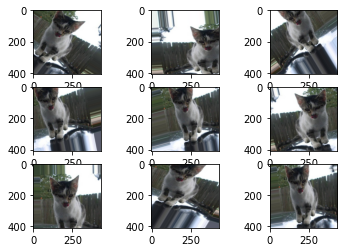

In [102]:
from tensorflow.keras.preprocessing import image
from numpy import expand_dims

img = image.load_img('../dogs_vs_cats/cats_and_dogs_small/train/cats/cat.11.jpg')
data = image.img_to_array(img)
samples = expand_dims(data, 0)

it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

#### 데이터 증강(Data Augmentation)을 적용한 모델

In [75]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.5)) # 오버피팅 방지를 위해 Dropout 층 추가
model.add(Dense(512, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(
    optimizer=tf.keras.optimizers.RMSprop(lr=1e-4),
    loss = tf.keras.losses.binary_crossentropy,
    metrics=["acc"]
)

In [76]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode="binary")
validation_genrator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=32, class_mode="binary")

with tf.device(":/GPU:0"):
    histoty = model.fit(train_generator, epochs=100, validation_data=validation_genrator)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
63/63 [==============================] - 28s 439ms/step - loss: 0.6929 - acc: 0.5235 - val_loss: 0.6991 - val_acc: 0.5000
Epoch 2/100
63/63 [==============================] - 29s 453ms/step - loss: 0.6868 - acc: 0.5330 - val_loss: 0.6685 - val_acc: 0.5770
Epoch 3/100
63/63 [==============================] - 28s 452ms/step - loss: 0.6769 - acc: 0.5605 - val_loss: 0.6573 - val_acc: 0.5980
Epoch 4/100
63/63 [==============================] - 28s 443ms/step - loss: 0.6718 - acc: 0.5805 - val_loss: 0.6862 - val_acc: 0.5270
Epoch 5/100
63/63 [==============================] - 27s 433ms/step - loss: 0.6634 - acc: 0.5980 - val_loss: 0.7082 - val_acc: 0.5200
Epoch 6/100
63/63 [==============================] - 27s 433ms/step - loss: 0.6585 - acc: 0.6025 - val_loss: 0.6230 - val_acc: 0.6430
Epoch 7/100
63/63 [==============================] - 28s 439ms/step - loss: 0.6425 - acc: 0.6260 - val_loss: 0.6

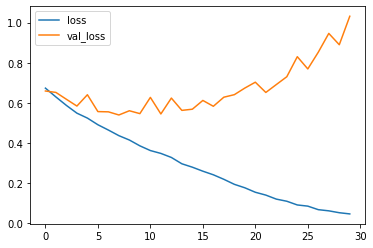

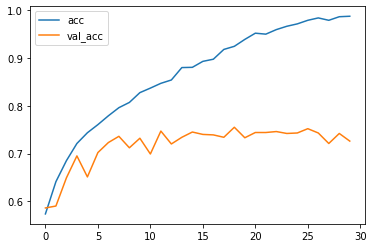

In [77]:
df_hist = pd.DataFrame(history.history)
df_hist[["loss", "val_loss"]].plot()
df_hist[["acc", "val_acc"]].plot()
plt.show()

## 사전 훈련된 컨브넷 사용
사전 훈련된 네트워크(pretrained network)는 일반적으로 대규모 이미지 분류 문제를 위해 대량의 데이터셋에서 미리 훈련되어 저장된 네트워크  
사전 훈련된 네트워크를 사용하는 두 가지 방법  
1. 특성 추출(feature extraction)
2. 미세 조정(fine tuning)

### 특성 추출(feature extraction)
사전에 학습된 네트워크의 표현을 사용하여 새로운 샘플에서 흥미로운 특성을 뽑아내는 것  
분류기 부분은 재사용을 하지 않음 -> FC에서 찾은 표현은 공간 개념을 제거하지만, 합성곱의 특성맵은 객체 위치를 고려하기 때문

In [1]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights="imagenet",
                  include_top=False, # 완전 분류기 포함 여부
                  input_shape=(150, 150, 3))

c:\Users\spec3\anaconda3\envs\tfpy\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


58892288/58889256 [==============================] - 2s 0us/step


`include_top`은 네트워크의 최상위 완전 연결 분류기 포함 여부  
-> 기본값은 이미지넷의 클래스 1,000개에 대응하는 FC 분류기이지만, (강아지와 고양이를 분류하는) FC 분류층을 추가할 예정이므로 포함하지 않음  

1. 출력을 넘파이 배열 형식으로 받아, 독립된 FC 분류기에 입력으로 사용하는 방법(데이터 증강을 사용 할 수 없음)
2. 불러온 모델 위에 `Dense` 층을 쌓아 확장하는 방법

#### 데이터 증강을 사용하지 않는 빠른 특성 추출(1번 방식)

In [2]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = "../dogs_vs_cats/cats_and_dogs_small/"
train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "validation")
test_dir = os.path.join(base_dir, "test")

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extraction_features(dir, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(dir, target_size=(150, 150), batch_size=batch_size, class_mode="binary")
    
    i = 0
    for input_batch, labels_batch in generator:
        features_batch = conv_base.predict(input_batch)
        features[i*batch_size:(i+1)*batch_size] = features_batch
        labels[i*batch_size:(i+1)*batch_size] = labels_batch
        i += 1
        if i*batch_size >= sample_count: break
    return features, labels

train_features, trian_labels = extraction_features(train_dir, 2000)
validation_features, validation_labels = extraction_features(validation_dir, 1000)
test_features, test_labels = extraction_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [3]:
train_features.shape, trian_labels.shape

((2000, 4, 4, 512), (2000,))

In [4]:
# Flatten
train_features = np.reshape(train_features, (2000, 4*4*512))
validation_features = np.reshape(validation_features, (1000, 4*4*512))
test_features = np.reshape(test_features, (1000, 4*4*512))

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf

model = Sequential()
model.add(Dense(256, activation="relu", input_dim=4*4*512))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

model.compile(
    optimizer=tf.keras.optimizers.RMSprop(lr=2e-5),
    loss = "binary_crossentropy",
    metrics = ["acc"]
)

with tf.device(":/GPU:0"):
    history = model.fit(train_features, trian_labels, epochs=30, batch_size=20, validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 2s 21ms/step - loss: 0.5809 - acc: 0.6810 - val_loss: 0.4210 - val_acc: 0.8400
Epoch 2/30
100/100 [==============================] - 2s 19ms/step - loss: 0.4179 - acc: 0.8135 - val_loss: 0.3450 - val_acc: 0.8710
Epoch 3/30
100/100 [==============================] - 2s 19ms/step - loss: 0.3511 - acc: 0.8505 - val_loss: 0.3116 - val_acc: 0.8880
Epoch 4/30
100/100 [==============================] - 2s 18ms/step - loss: 0.3098 - acc: 0.8720 - val_loss: 0.2905 - val_acc: 0.8880
Epoch 5/30
100/100 [==============================] - 2s 19ms/step - loss: 0.2894 - acc: 0.8830 - val_loss: 0.2753 - val_acc: 0.8950
Epoch 6/30
100/100 [==============================] - 2s 19ms/step - loss: 0.2594 - acc: 0.9015 - val_loss: 0.2637 - val_acc: 0.9000
Epoch 7/30
100/100 [==============================] - 2s 19ms/step - loss: 0.2422 - acc: 0.9135 - val_loss: 0.2647 - val_acc: 0.8870
Epoch 8/30
100/100 [==============================] - 2s 19ms/step - 

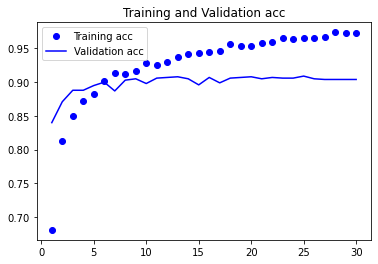

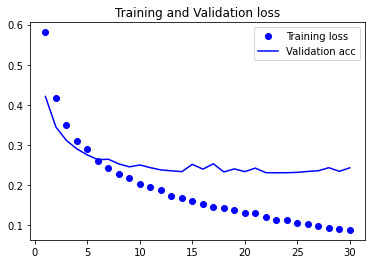

In [6]:
import matplotlib.pyplot as plt

acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and Validation acc")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation acc")
plt.title("Training and Validation loss")
plt.legend()

plt.show()

오버피팅이 발생한 모습을 확인 가능  
-> 작은 데이터 셋에서는 오버피팅을 방지하기 위해 데이터 증강을 사용

#### 데이터 증강을 사용한 특성 추출(2번 방식)

In [7]:
from tensorflow.keras.layers import Flatten

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

모델을 컴파일하고 훈련하기 전에 합성곱 기반 층을 동결(freezing)하는 것이 중요  
-> 훈련하는 동안 가중치가 업데이트되지 않도록 막는다는 의미

In [8]:
len(model.trainable_weights)

30

동결 이전에는 30개의 가중치가 훈련 중에 업데이트 됨  
사전 학습된 모델의 가중치를 동결하면,

In [9]:
conv_base.trainable =False
len(model.trainable_weights)

4

4개의 가중치만 훈련 중 업데이트 되는 것으로 변경 됨

In [13]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    fill_mode = "nearest"
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode="binary")
validation_genrator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode="binary")

model.compile(
    optimizer=tf.keras.optimizers.RMSprop(lr=2e-5),
    loss = "binary_crossentropy",
    metrics=["acc"]
)

with tf.device("/device:GPU:0"):
    history = model.fit(train_generator, epochs=30, validation_data=validation_genrator, validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 94s 937ms/step - loss: 0.5521 - acc: 0.7380 - val_loss: 0.4335 - val_acc: 0.8320
Epoch 2/30
100/100 [==============================] - 90s 902ms/step - loss: 0.4158 - acc: 0.8360 - val_loss: 0.3477 - val_acc: 0.8690
Epoch 3/30
100/100 [==============================] - 90s 896ms/step - loss: 0.3579 - acc: 0.8465 - val_loss: 0.3156 - val_acc: 0.8750
Epoch 4/30
100/100 [==============================] - 87s 874ms/step - loss: 0.3224 - acc: 0.8690 - val_loss: 0.2897 - val_acc: 0.8830
Epoch 5/30
100/100 [==============================] - 88s 875ms/step - loss: 0.3055 - acc: 0.8765 - val_loss: 0.2806 - val_acc: 0.8950
Epoch 6/30
100/100 [==============================] - 90s 902ms/step - loss: 0.2849 - acc: 0.8815 - val_loss: 0.2788 - val_acc: 0.8840
Epoch 7/30
100/100 [==============================] - 87s 875ms/step - loss: 0.2837 - acc: 0.8785 - val_lo

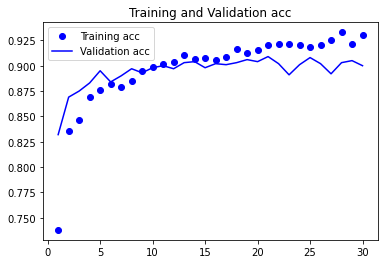

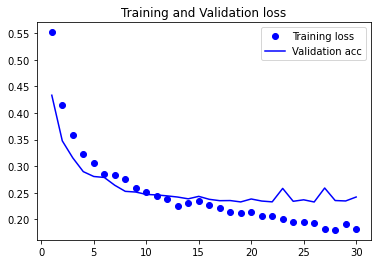

In [14]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and Validation acc")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation acc")
plt.title("Training and Validation loss")
plt.legend()

plt.show()

### 미세 조정(fine tuning)
모델을 재사용하는 데 널리 사용되는 다른 방식으로, 특성 추출을 보완한 방식  
특성 추출에 사용했던 동결 모델의 상위 층 몇개를 동결하지 않고 함께 훈련하는 것

1. 사전에 훈련된 기반 네트워크 위에 새로운 네트워크를 추가
2. 기반 네트워크 동결
3. 새로 추가한 네트워크 훈련
4. 기반 네트워크에서 일부 층 동결 해제
5. 동결을 해제한 층과 새로 추가한 층을 훈련

- 하위 층들은 좀 더 일반적이고 재사용 가능한 특성들을 인코딩하는 반면, 상위 층들은 좀 더 특화된 특성을 인코딩 -> 상위층(출력에 가까운)을 미세 조정하는 것이 좋음
- 훈련해야하는 파라미터가 많을수록 오버피팅의 가능성이 높아짐

In [15]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name=="block5_conv1":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [16]:
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(lr=1e-5),
    loss = "binary_crossentropy",
    metrics=["acc"]
)

with tf.device("/device:GPU:0"):
    history = model.fit(train_generator, epochs=10, validation_data=validation_genrator, validation_steps=50) # GPU로 실행해도 오래 걸려서 epochs 수 감소 시킴

Epoch 1/10
100/100 [==============================] - 117s 1s/step - loss: 0.2039 - acc: 0.9165 - val_loss: 0.2330 - val_acc: 0.9070
Epoch 2/10
100/100 [==============================] - 117s 1s/step - loss: 0.1569 - acc: 0.9365 - val_loss: 0.2661 - val_acc: 0.8950
Epoch 3/10
100/100 [==============================] - 118s 1s/step - loss: 0.1459 - acc: 0.9410 - val_loss: 0.2239 - val_acc: 0.9130
Epoch 4/10
100/100 [==============================] - 117s 1s/step - loss: 0.1189 - acc: 0.9505 - val_loss: 0.2228 - val_acc: 0.9110
Epoch 5/10
100/100 [==============================] - 118s 1s/step - loss: 0.1129 - acc: 0.9505 - val_loss: 0.2101 - val_acc: 0.9210
Epoch 6/10
100/100 [==============================] - 117s 1s/step - loss: 0.0963 - acc: 0.9615 - val_loss: 0.2477 - val_acc: 0.9110
Epoch 7/10
100/100 [==============================] - 118s 1s/step - loss: 0.0895 - acc: 0.9655 - val_loss: 0.2081 - val_acc: 0.9270
Epoch 8/10
100/100 [==============================] - 117s 1s/step - 

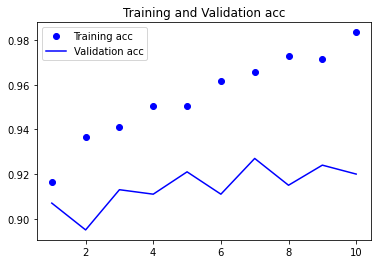

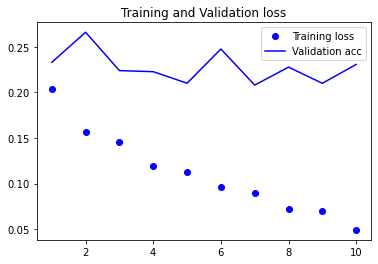

In [17]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and Validation acc")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation acc")
plt.title("Training and Validation loss")
plt.legend()

plt.show()

## 학습 시각화
- 중간층의 출력 시각화: 입력을 어떻게 변형 시키는지 이해하고, 개별적인 합성곱층 필터의 의미 파악에 용이
- 필터 시각화: 필터가 찾으려하는 시각적인 패턴과 개념 파악에 용이
- 클래스 활성에 대한 히트맵 시각화: 이미지의 어느 부분이 기여했고 위치를 추정하는데 용이

### 중간층의 출력 시각화

(1, 150, 150, 3)


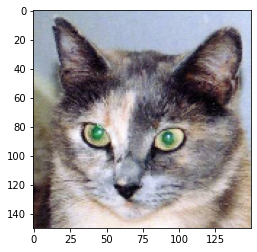

In [18]:
# 개별 이미지 전처리
from tensorflow.keras.preprocessing import image
img_path = "../dogs_vs_cats/cats_and_dogs_small/test/cats/cat.1700.jpg"

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

print(img_tensor.shape)
plt.imshow(img_tensor[0])
plt.show()

(1, 148, 148, 32)


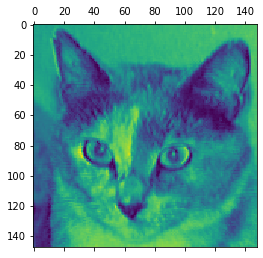

In [27]:
from tensorflow.keras import models

layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

activations = activation_model.predict(img_tensor)

first_layer_activation = activations[0]
print(first_layer_activation.shape)
plt.matshow(first_layer_activation[0, :, :, 19], cmap="viridis")

C:\Users\spec3\AppData\Local\Temp\ipykernel_26020\61530495.py:18: RuntimeWarning: invalid value encountered in divide
  channel_image /= channel_image.std()


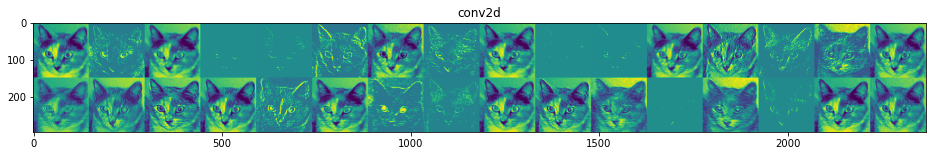

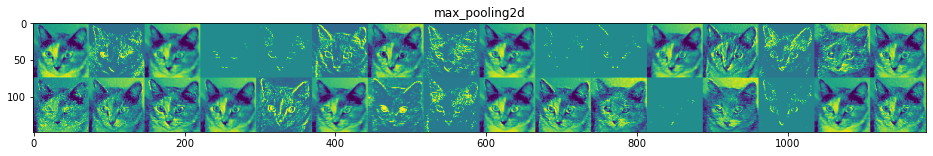

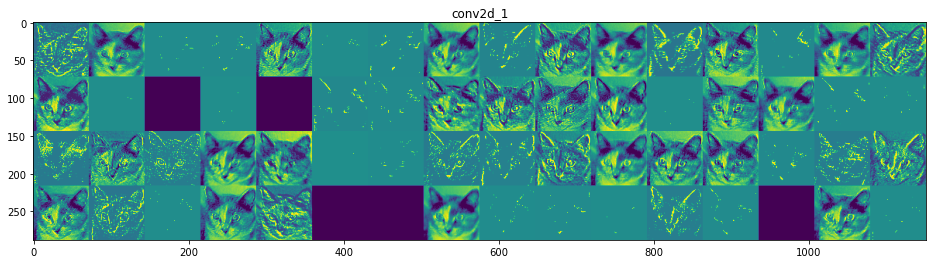

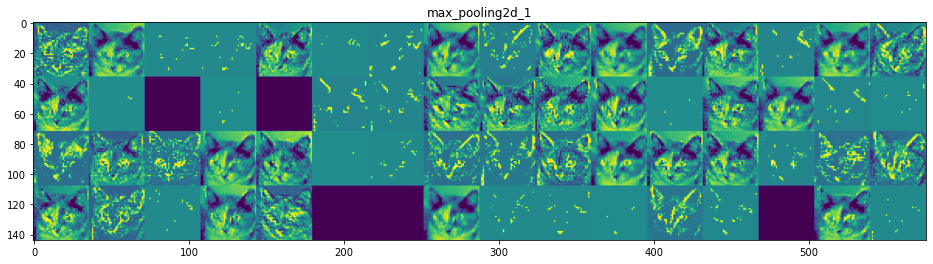

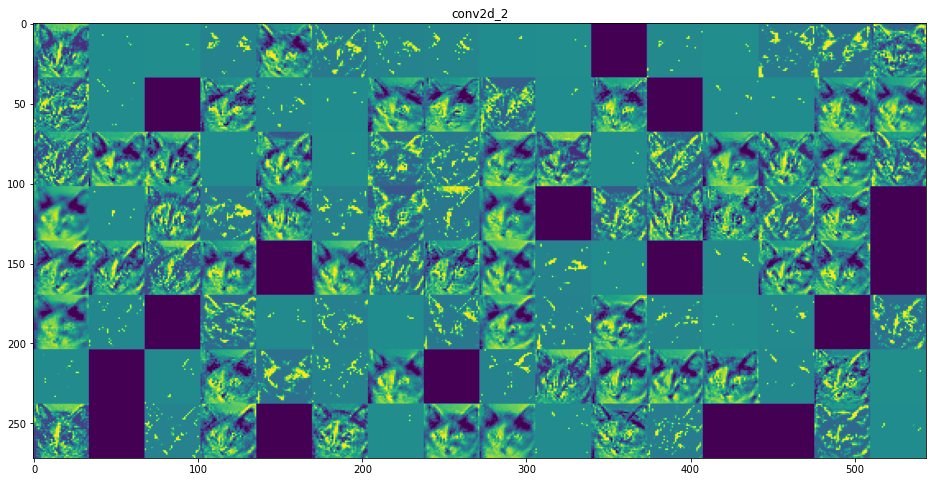

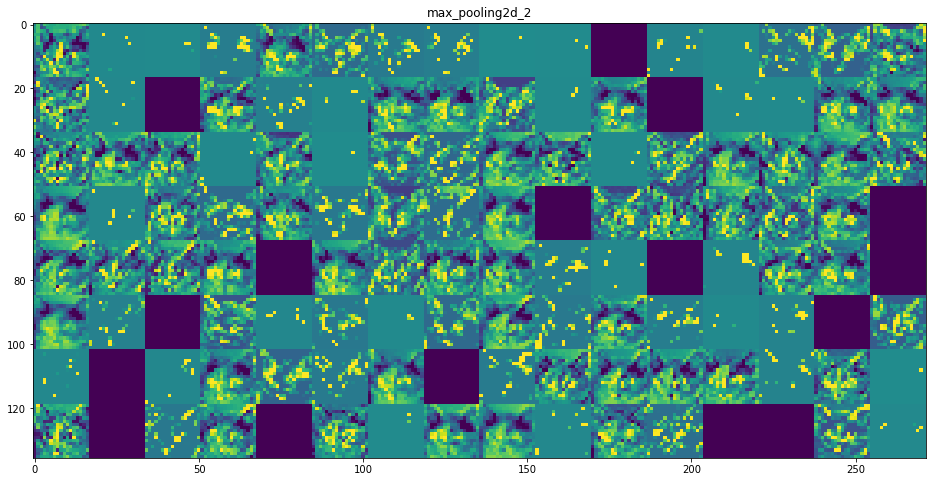

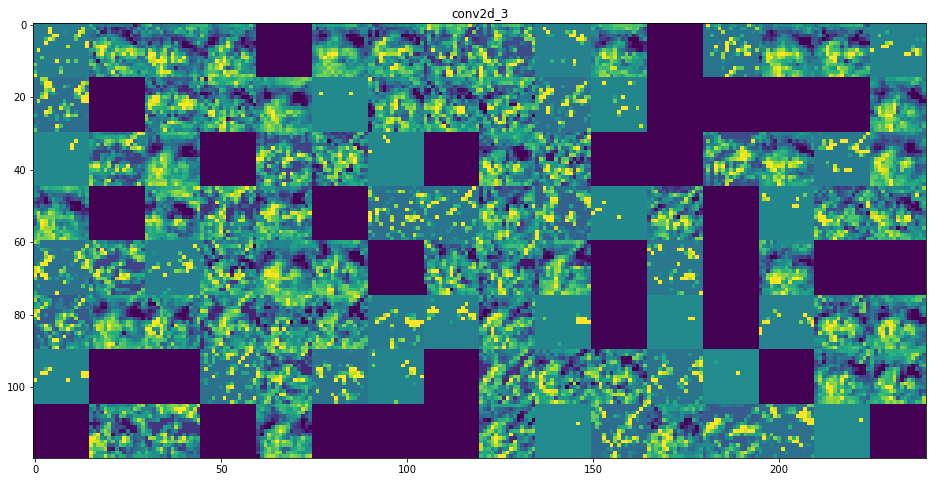

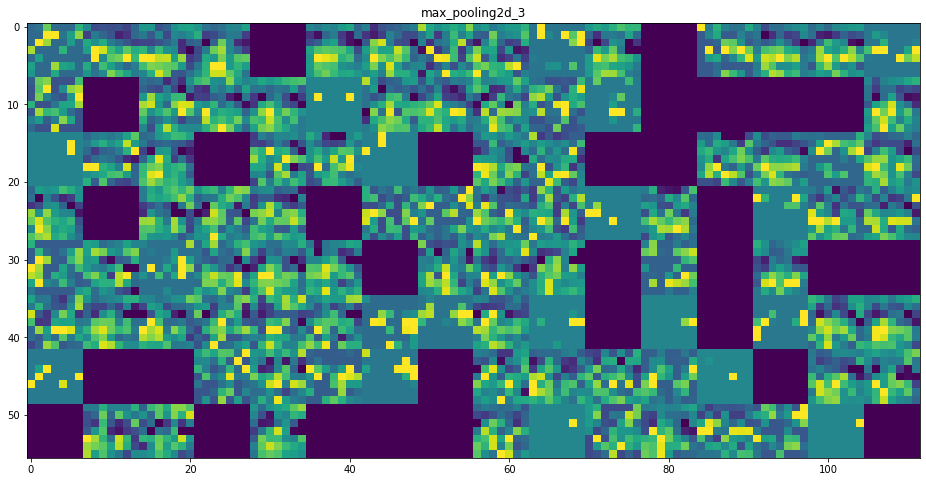

In [28]:
# 모든 활성화에 있는 채널 시각화
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)
    
imges_per_row = 16
# 특성맵 그리기
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features//imges_per_row
    display_grid = np.zeros((size*n_cols, imges_per_row*size))
    
    for col in range(n_cols):
        for row in range(imges_per_row):
            channel_image = layer_activation[0, :, :, col*imges_per_row+row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype("uint8")
            display_grid[col*size:(col+1)*size, row*size:(row+1)*size] = channel_image
        scale = 1./size
    plt.figure(figsize=(scale*display_grid.shape[1], scale*display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect="auto", cmap="viridis")
plt.show()

### 필터 시각화

In [34]:
tf.compat.v1.disable_eager_execution()

In [35]:
from tensorflow.keras import backend as K

model = VGG16(weights="imagenet", include_top=False)

layer_name = "block3_conv1"
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

grads = K.gradients(loss, model.input)[0]
grads /= (K.sqrt(K.mean(K.square(grads)))+1e-5)

iterate = K.function([model.input], [loss, grads])

loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

In [36]:
input_img_data = np.random.random((1, 150, 150, 3))*20+128. # 잡음이 있는 회색 이미지

step = 1
for i in range(40):
    loss_value, grads_value = iterate([input_img_data])
    input_img_data += grads_value*step

In [41]:
# Tensor -> Img
def deprocess_image(x):
    x -= x.mean()
    x /= (x.std()+1e-5)
    x *= 0.1
    
    x += 0.5
    x = np.clip(x, 0, 1)
    
    x *= 255
    x = np.clip(x, 0, 255).astype("uint8")
    return x

# 필터 시각화
def generate_pattern(layer_name, filter_index, size=150):
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    
    grads = K.gradients(loss, model.input)[0]
    
    grads /= (K.sqrt(K.mean(K.square(grads)))+1e-5)
    
    iterate = K.function([model.input], [loss, grads])
    input_img_data = np.random.random((1, size, size, 3))*20+128.
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value*step
    img = input_img_data[0]
    return deprocess_image(img)

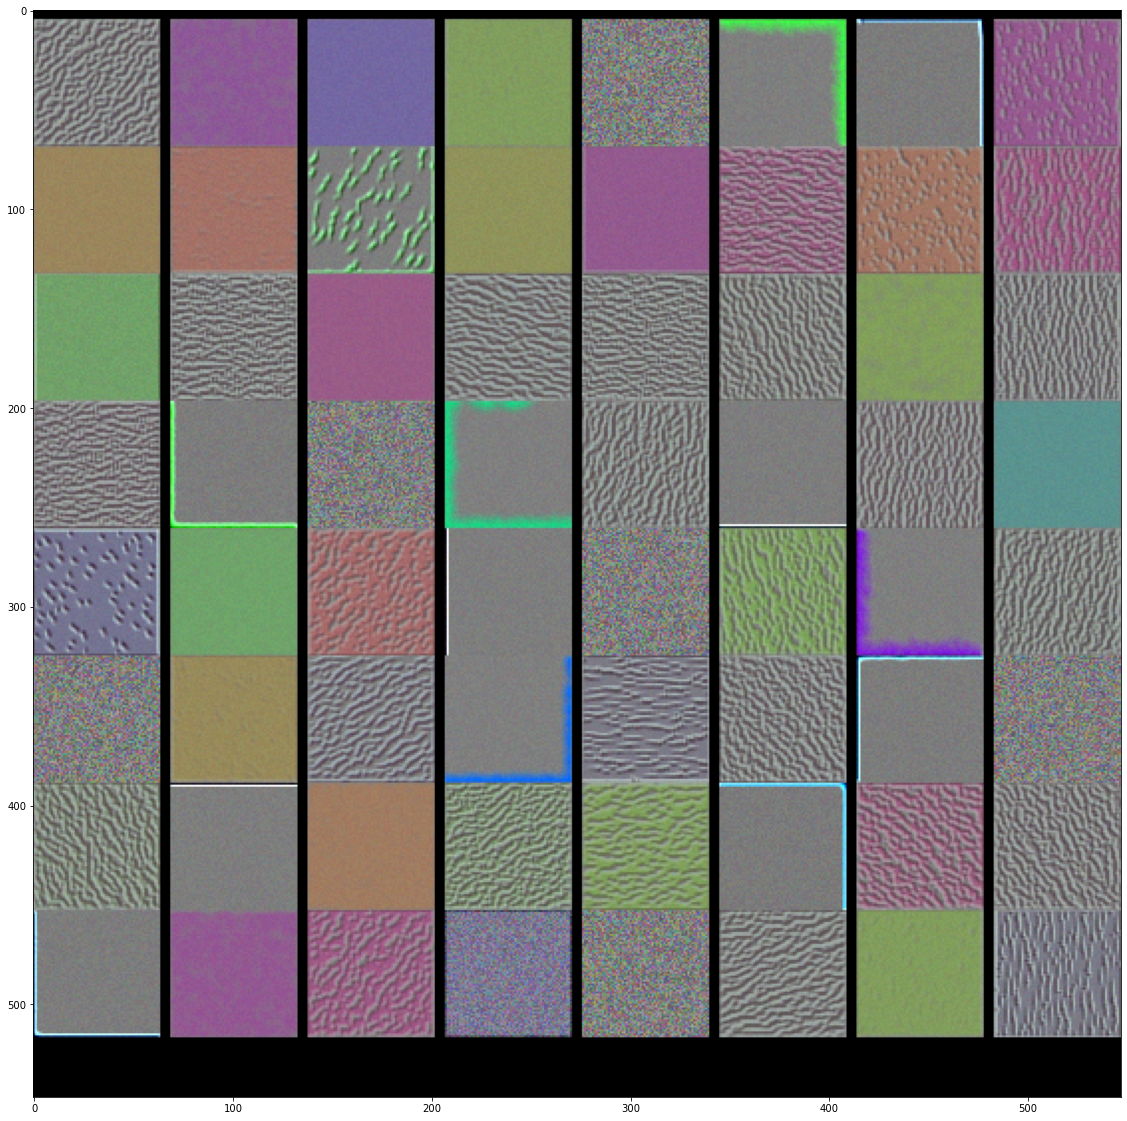

In [42]:
# 층에 있는 각 필터에 반응하는 패턴 찾기
layer_name = "block1_conv1"
size = 64
margin = 5

results = np.zeros((8*size+7*margin, 8*size+7*margin, 3), dtype="uint8")

for i in range(8):
    for j in range(8):
        filter_img = generate_pattern(layer_name, i+(j*8), size=size)
        h_start = i*size+1*margin
        h_end = h_start+size
        v_start = j*size+j*margin
        v_end = v_start+size
        results[h_start:h_end, v_start:v_end, :] = filter_img
plt.figure(figsize=(20, 20))
plt.imshow(results)

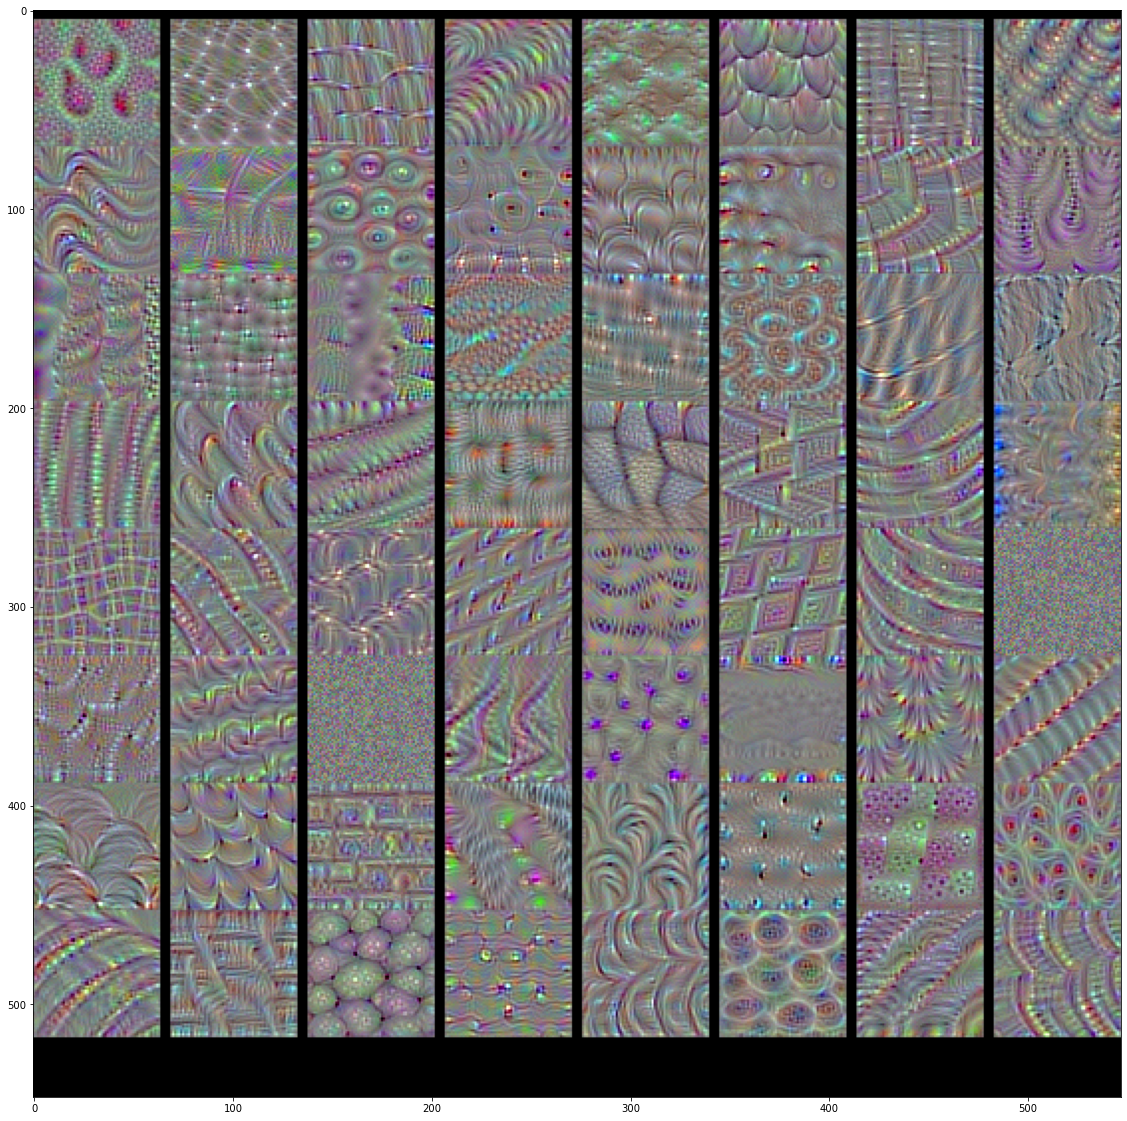

In [45]:
layer_name = "block4_conv1"
size = 64
margin = 5

results = np.zeros((8*size+7*margin, 8*size+7*margin, 3), dtype="uint8")

for i in range(8):
    for j in range(8):
        filter_img = generate_pattern(layer_name, i+(j*8), size=size)
        h_start = i*size+1*margin
        h_end = h_start+size
        v_start = j*size+j*margin
        v_end = v_start+size
        results[h_start:h_end, v_start:v_end, :] = filter_img
plt.figure(figsize=(20, 20))
plt.imshow(results)

상위층(출력에 가까울수록) 패턴이 복잡해짐

### 클래스 활성화의 히트맵 시각화
클래스 활성화 맵(Class Activation Map. CAM) 시각화라고 부름  
이미지의 어느 부분이 최종 분류 결정에 기여하는지 이해하는데 유용

In [67]:
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

model = VGG16(weights="imagenet")

img_path = "../dogs_vs_cats/cats_and_dogs_small/test/dogs/dog.1573.jpg"

img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

(1, 224, 224, 3)


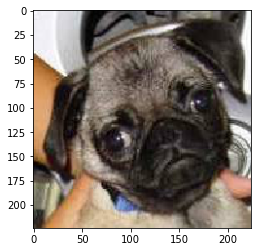

In [68]:
img = image.load_img(img_path, target_size=(224, 224))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

print(img_tensor.shape)
plt.imshow(img_tensor[0])
plt.show()

In [69]:
preds = model.predict(x)
print(f"Predict: {decode_predictions(preds, top=3)}")

Predict: [[('n02110958', 'pug', 0.9892519), ('n02108422', 'bull_mastiff', 0.004140125), ('n02112706', 'Brabancon_griffon', 0.003263504)]]


In [70]:
# Grad-CAM 알고리즘
pred_output = model.output[:, np.argmax(preds[0])]

last_conv_layer = model.get_layer("block5_conv3")
grads = K.gradients(pred_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))

iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=1)

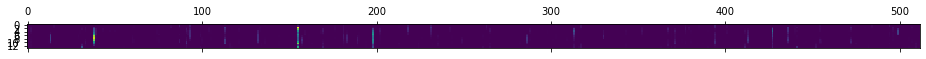

In [71]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

In [72]:
import cv2

img = cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255*heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = heatmap*0.04+img

cv2.imwrite("./CAM.jpg", superimposed_img)

True